In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import classification_report,accuracy_score
import tensorflow as tf
from imblearn import metrics
# Data Handling: Load CSV

df = pd.read_csv("creditcard.csv")

# get to know list of features, data shape, stat. description.
print(df.shape)

print("First 5 lines:")
print(df.head(5))

print("describe: ")
print(df.describe())

print("info: ")
print(df.info())



(284807, 31)
First 5 lines:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

    

Class as pie chart:


Text(0, 0.5, '')

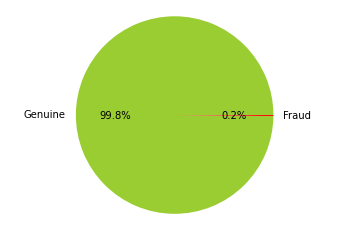

In [2]:
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(df.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distributions \n (0 || 1)')

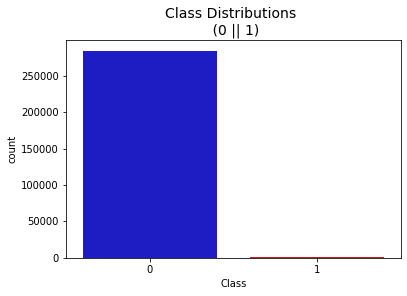

In [79]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0 || 1)', fontsize=14)

Time variable
284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: Time_Hr, dtype: float64


Text(0, 0.5, '# transactions')

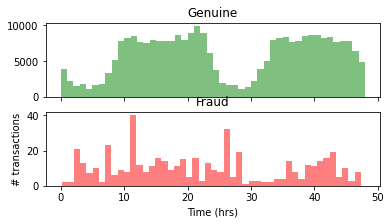

In [3]:
print("Time variable")
df["Time_Hr"] = df["Time"]/3600 # convert to hours
print(df["Time_Hr"].tail(5))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax1.hist(df.Time_Hr[df.Class==0],bins=48,color='g',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(df.Time_Hr[df.Class==1],bins=48,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('# transactions')

In [4]:
df = df.drop(['Time'],axis=1)

Text(0, 0.5, '# transactions')

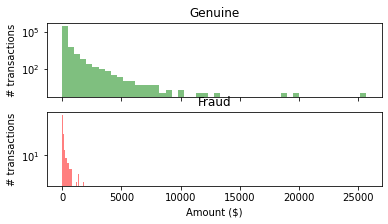

In [5]:
fig, (ax3,ax4) = plt.subplots(2,1, figsize = (6,3), sharex = True)
ax3.hist(df.Amount[df.Class==0],bins=50,color='g',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Genuine') # to see the tails
ax3.set_ylabel('# transactions')
ax4.hist(df.Amount[df.Class==1],bins=50,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('Amount ($)')
ax4.set_ylabel('# transactions')

In [6]:
from sklearn.preprocessing import StandardScaler
df['scaled_Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount'],axis=1)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

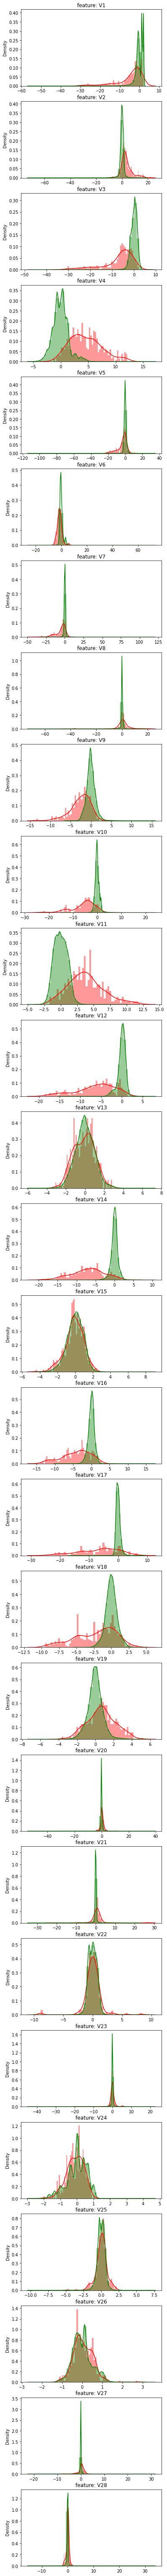

In [7]:
import seaborn as sns
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(df[df.iloc[:,0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(df[col][df.Class == 1], bins=50, color='r')
    sns.distplot(df[col][df.Class == 0], bins=50, color='g')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()

In [8]:
def split_data(df, drop_list):
    df = df.drop(drop_list,axis=1)
    print(df.columns)
  
    from sklearn.model_selection import train_test_split
    y = df['Class'].values #target
    X = df.drop(['Class'],axis=1).values #features
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

    print("train-set size: ", len(y_train),
      "\ntest-set size: ", len(y_test))
    print("fraud cases in test-set: ", sum(y_test))
    return X_train, X_test, y_train, y_test

In [9]:
def get_predictions(clf, X_train, y_train, X_test):
    # create classifier
    model = clf
    # fit it to training data
    model.fit(X_train,y_train)
    # predict using test data
    y_pred = model.predict(X_test)
 
    
    
    return y_pred

In [10]:
def print_scores(y_test,y_pred):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
  

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [12]:

drop_list = []
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'Time_Hr',
       'scaled_Amount'],
      dtype='object')
train-set size:  227845 
test-set size:  56962
fraud cases in test-set:  98
test-set confusion matrix:
 [[55535  1329]
 [   15    83]]
recall score:  0.8469387755102041
precision score:  0.058781869688385266
f1 score:  0.10993377483443707
accuracy score:  0.9764053228468101


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.85      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.91      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [14]:
auc = roc_auc_score(y_test, y_pred)
auc

0.9117836111653441

### Method 1: Undersampling

In [15]:
# Class count
count_class_0, count_class_1 = df.Class.value_counts()

# Divide by class
df_class_0 = df[df['Class'] == 0]
df_class_1 = df[df['Class'] == 1]

In [16]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Class.value_counts())

Random under-sampling:
0    492
1    492
Name: Class, dtype: int64


In [17]:
X = df_test_under.drop('Class',axis='columns')
y = df_test_under['Class']

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [18]:
# Number of classes in training Data
y_train1.value_counts()

1    394
0    393
Name: Class, dtype: int64

In [19]:
y_preds1 = get_predictions(GaussianNB(), X_train1, y_train1, X_test1)
print_scores(y_test1,y_preds1)

test-set confusion matrix:
 [[93  6]
 [12 86]]
recall score:  0.8775510204081632
precision score:  0.9347826086956522
f1 score:  0.9052631578947369
accuracy score:  0.9086294416243654


In [20]:
print(classification_report(y_test1, y_preds1))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        99
           1       0.93      0.88      0.91        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



In [21]:
auc = roc_auc_score(y_test1, y_preds1)
auc

0.9084724799010513

### Method2: Oversampling

In [22]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Class.value_counts())

Random over-sampling:
0    284315
1    284315
Name: Class, dtype: int64


In [23]:
X = df_test_over.drop('Class',axis='columns')
y = df_test_over['Class']

from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [24]:
# Number of classes in training Data
y_train2.value_counts()

0    227452
1    227452
Name: Class, dtype: int64

In [25]:
y_preds2 = get_predictions(GaussianNB(), X_train2, y_train2, X_test2)
print_scores(y_test2,y_preds2)

test-set confusion matrix:
 [[55468  1395]
 [ 8078 48785]]
recall score:  0.8579392575136732
precision score:  0.9722000797130331
f1 score:  0.911502853993255
accuracy score:  0.9167033044334629


In [26]:
print(classification_report(y_test2, y_preds2))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92     56863
           1       0.97      0.86      0.91     56863

    accuracy                           0.92    113726
   macro avg       0.92      0.92      0.92    113726
weighted avg       0.92      0.92      0.92    113726



In [27]:
auc = roc_auc_score(y_test2, y_preds2)
auc

0.9167033044334628

### Method3: SMOTE

In [28]:
X = df.drop('Class',axis='columns')
y = df['Class']

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [31]:
# Number of classes in training Data
y_train3.value_counts()

0    227452
1    227452
Name: Class, dtype: int64

In [32]:
y_preds3 = get_predictions(GaussianNB(), X_train3, y_train3, X_test3)
print_scores(y_test3,y_preds3)

test-set confusion matrix:
 [[55557  1306]
 [ 8489 48374]]
recall score:  0.8507113588801154
precision score:  0.9737117552334944
f1 score:  0.9080652881934994
accuracy score:  0.9138719378154512


In [33]:
print(classification_report(y_test3, y_preds3))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92     56863
           1       0.97      0.85      0.91     56863

    accuracy                           0.91    113726
   macro avg       0.92      0.91      0.91    113726
weighted avg       0.92      0.91      0.91    113726



In [34]:
auc = roc_auc_score(y_test3, y_preds3)
auc

0.9138719378154512

### Method4: Use of Ensemble with undersampling

In [35]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [36]:
# Regain Original features and labels
X = df.drop('Class',axis='columns')
y = df['Class']

In [37]:
from sklearn.model_selection import train_test_split
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [38]:
y_train4.value_counts()

0    227451
1       394
Name: Class, dtype: int64

model1 --> class1(75817) + class0(0, 75817)

model2 --> class1(75817) + class0(75818, 151634)

model3 --> class1(75817) + class0(151635, 227451)

In [39]:
df3 = X_train4.copy()
df3['Class'] = y_train4

In [40]:
df3.head()  

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Time_Hr,scaled_Amount,Class
155943,-3.041529,-3.085345,0.620909,0.472797,1.622026,1.569706,-0.482014,0.392797,1.861140,-0.897385,...,0.954311,-0.245517,-0.642095,-0.561935,0.345398,0.692724,-0.148134,29.680556,1.645814,0
33068,1.214877,-0.072416,0.344248,-0.232460,-0.394748,-0.364018,-0.220649,0.063925,0.025438,-0.058045,...,-0.092418,0.066723,0.083955,0.130229,0.973457,-0.072596,-0.010610,10.299167,-0.346832,0
177995,-0.636294,0.230968,0.386504,-1.002177,1.828275,0.806959,0.487332,0.420646,-0.471313,-0.659698,...,-0.246674,0.030465,-1.643821,-0.658497,0.251426,0.114681,0.136042,34.285833,-0.345313,0
13651,1.154628,0.434089,0.745448,1.466892,-0.245114,-0.530825,-0.025459,-0.162330,1.209003,-0.372581,...,-0.128125,0.056117,0.326711,0.402602,-0.453210,0.011865,0.020758,6.722778,-0.313249,0
170499,1.804130,-0.356631,-1.802604,0.379711,0.054241,-0.790223,0.105311,-0.110886,0.880454,-0.693314,...,-0.496517,0.053520,-0.464790,-0.111990,-0.096846,-0.034453,-0.018435,33.391111,0.091118,0


In [41]:
df3_class0 = df3[df3.Class==0]
df3_class1 = df3[df3.Class==1]

In [42]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train4 = df_train.drop('Class', axis='columns')
    y_train4 = df_train.Class
    return X_train4, y_train4    

In [43]:
X_train4, y_train4 = get_train_batch(df3_class0, df3_class1, 0, 75817)

y_pred1 = get_predictions(GaussianNB(), X_train4, y_train4, X_test4)


In [44]:
X_train4, y_train4 = get_train_batch(df3_class0, df3_class1, 75818, 151634)

y_pred2 = get_predictions(GaussianNB(), X_train4, y_train4, X_test4)


In [45]:
X_train4, y_train4 = get_train_batch(df3_class0, df3_class1, 151635, 227451)

y_pred3 = get_predictions(GaussianNB(), X_train4, y_train4, X_test4)

In [46]:
len(y_pred1)

56962

In [47]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [48]:
cl_rep = classification_report(y_test4, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.82      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.90      0.55     56962
weighted avg       1.00      0.98      0.99     56962



****

###Method 5 : Borderline SMOTE 1

In [49]:
X = df.drop('Class',axis='columns')
y = df['Class']

In [50]:
from imblearn.over_sampling import BorderlineSMOTE

bsmote = BorderlineSMOTE(sampling_strategy='minority',random_state = 42,kind='borderline-1')
X_bs, y_bs = bsmote.fit_resample(X, y)

y_bs.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_bs, y_bs, test_size=0.2, random_state=15, stratify=y_bs)

In [52]:
# Number of classes in training Data
y_train5.value_counts()

0    227452
1    227452
Name: Class, dtype: int64

In [53]:
y_preds5 = get_predictions(GaussianNB(), X_train5, y_train5, X_test5)
print_scores(y_test5,y_preds5)

test-set confusion matrix:
 [[55471  1392]
 [ 6118 50745]]
recall score:  0.8924080685155549
precision score:  0.973301110535704
f1 score:  0.9311009174311926
accuracy score:  0.933964089126497


In [54]:
print(classification_report(y_test5, y_preds5))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     56863
           1       0.97      0.89      0.93     56863

    accuracy                           0.93    113726
   macro avg       0.94      0.93      0.93    113726
weighted avg       0.94      0.93      0.93    113726



In [55]:
auc = roc_auc_score(y_test5, y_preds5)
auc

0.933964089126497

###Method 6: Borderline SMOTE 2

In [56]:
X = df.drop('Class',axis='columns')
y = df['Class']

In [57]:
from imblearn.over_sampling import BorderlineSMOTE

bsmote = BorderlineSMOTE(sampling_strategy='minority',random_state = 42,kind='borderline-2')
X_bsm, y_bsm = bsmote.fit_resample(X, y)

y_bsm.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split
X_train6, X_test6, y_train6, y_test6 = train_test_split(X_bsm, y_bsm, test_size=0.2, random_state=15, stratify=y_bsm)

In [59]:
# Number of classes in training Data
y_train6.value_counts()

0    227452
1    227452
Name: Class, dtype: int64

In [60]:
y_preds6 = get_predictions(GaussianNB(), X_train6, y_train6, X_test6)
print_scores(y_test6,y_preds6)

test-set confusion matrix:
 [[55385  1478]
 [ 9545 47318]]
recall score:  0.8321404076464485
precision score:  0.969710632019018
f1 score:  0.8956738186051353
accuracy score:  0.9030740551852698


In [61]:
print(classification_report(y_test6, y_preds6))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     56863
           1       0.97      0.83      0.90     56863

    accuracy                           0.90    113726
   macro avg       0.91      0.90      0.90    113726
weighted avg       0.91      0.90      0.90    113726



In [62]:
auc = roc_auc_score(y_test6, y_preds6)
auc

0.9030740551852698

###Method 7 : SVMSmote

In [63]:
X = df.drop('Class',axis='columns')
y = df['Class']

In [64]:
from imblearn.over_sampling import SVMSMOTE

svmsmote = SVMSMOTE(sampling_strategy='minority',random_state = 42)
X_svm, y_svm = svmsmote.fit_resample(X, y)

y_svm.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split
X_train7, X_test7, y_train7, y_test7 = train_test_split(X_svm, y_svm, test_size=0.2, random_state=15, stratify=y_svm)

In [66]:
y_train7.value_counts()

0    227452
1    227452
Name: Class, dtype: int64

In [67]:
y_preds7 = get_predictions(GaussianNB(), X_train7, y_train7, X_test7)
print_scores(y_test7,y_preds7)

test-set confusion matrix:
 [[55422  1441]
 [ 4544 52319]]
recall score:  0.9200886340854334
precision score:  0.9731956845238096
f1 score:  0.9458973269573235
accuracy score:  0.9473735117739127


In [68]:
print(classification_report(y_test7, y_preds7))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     56863
           1       0.97      0.92      0.95     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



In [69]:
auc = roc_auc_score(y_test7, y_preds7)
auc

0.9473735117739126

###Method 8 : ADASYN

In [70]:
X = df.drop('Class',axis='columns')
y = df['Class']

In [71]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(sampling_strategy='minority',random_state = 42)
X_ada, y_ada = ada.fit_resample(X, y)

y_ada.value_counts()

0    284315
1    284253
Name: Class, dtype: int64

In [72]:
from sklearn.model_selection import train_test_split
X_train8, X_test8, y_train8, y_test8 = train_test_split(X_ada, y_ada, test_size=0.2, random_state=15, stratify=y_ada)

In [73]:
y_train8.value_counts()

0    227452
1    227402
Name: Class, dtype: int64

In [74]:
y_preds8 = get_predictions(GaussianNB(), X_train8, y_train8, X_test8)
print_scores(y_test8,y_preds8)

test-set confusion matrix:
 [[54417  2446]
 [27685 29166]]
recall score:  0.5130252766002357
precision score:  0.9226243198785271
f1 score:  0.6593943230503148
accuracy score:  0.7350282287141425


In [75]:
print(classification_report(y_test8, y_preds8))

              precision    recall  f1-score   support

           0       0.66      0.96      0.78     56863
           1       0.92      0.51      0.66     56851

    accuracy                           0.74    113714
   macro avg       0.79      0.74      0.72    113714
weighted avg       0.79      0.74      0.72    113714



In [76]:
auc = roc_auc_score(y_test8, y_preds8)
auc

0.7350048036800662

###Confusion Matrix for all algorithms

In [77]:
import seaborn as sn 



Naive Bayes Algotithm
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.85      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.91      0.55     56962
weighted avg       1.00      0.98      0.99     56962

1 : Undersampling
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        99
           1       0.93      0.88      0.91        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197

2 : Oversampling
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     56863
           1       0.97      0.86      0.91     56863

    accuracy                           0.92    113726
   macro avg       0.92      0.92      0.92    113726
weighted avg     

Text(69.0, 0.5, 'Truth')

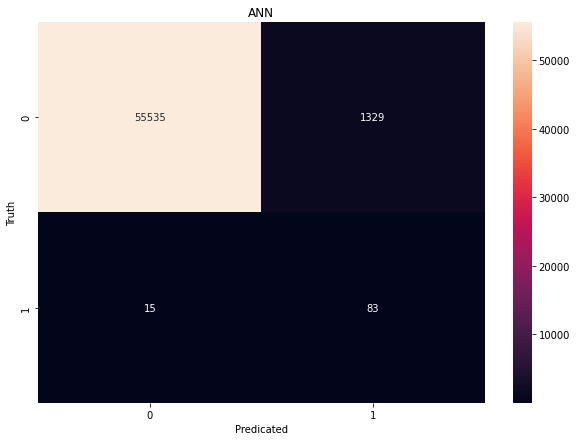

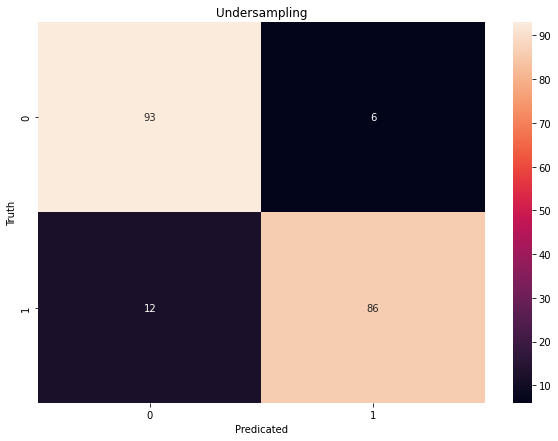

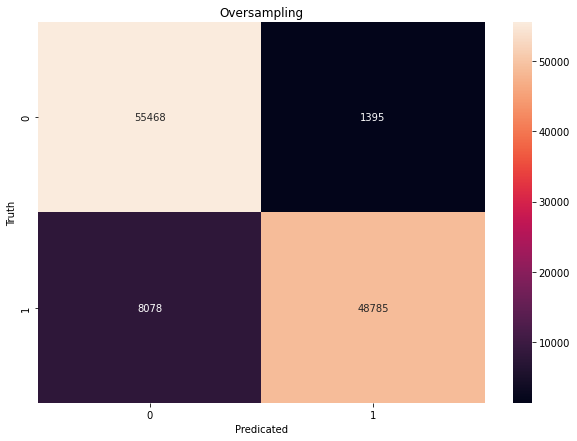

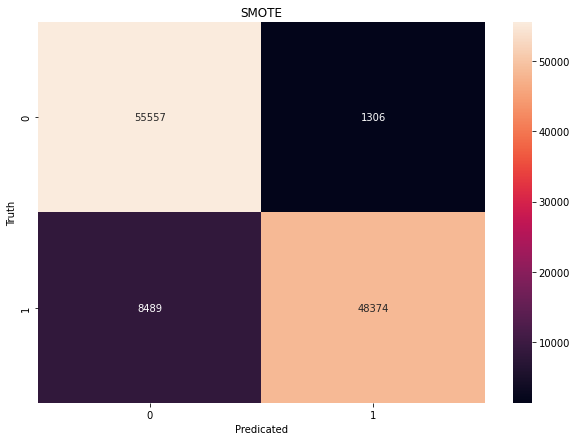

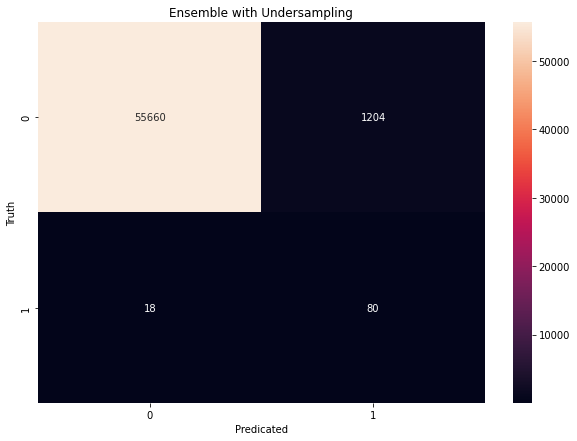

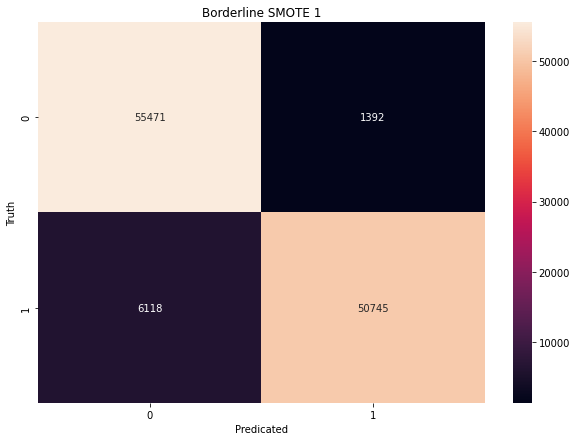

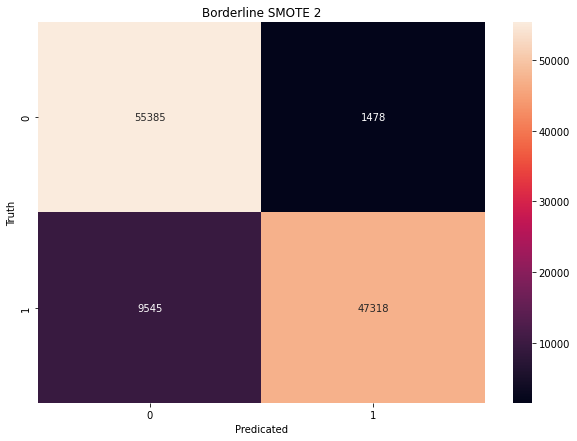

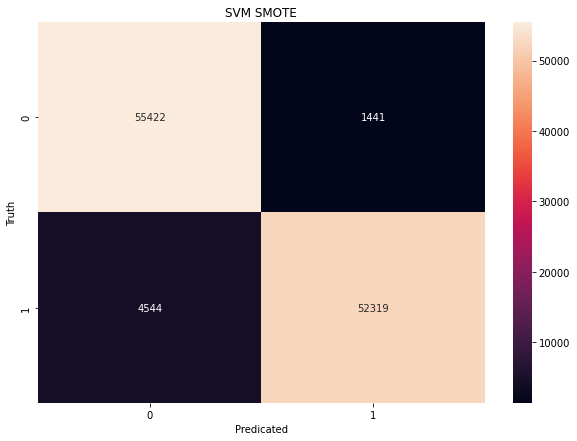

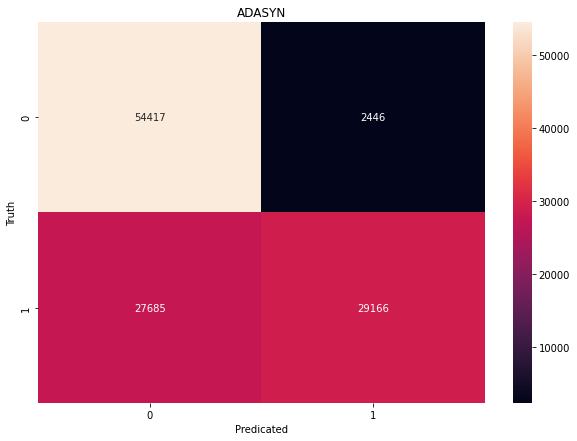

In [78]:
print("Naive Bayes Algotithm")
print(classification_report(y_test, y_pred))
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.title('ANN')
plt.xlabel('Predicated')
plt.ylabel('Truth')

print("1 : Undersampling")
print(classification_report(y_test1, y_preds1))
cm=tf.math.confusion_matrix(labels=y_test1,predictions=y_preds1)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.title('Undersampling')
plt.xlabel('Predicated')
plt.ylabel('Truth')

print("2 : Oversampling")
print(classification_report(y_test2, y_preds2))
cm=tf.math.confusion_matrix(labels=y_test2,predictions=y_preds2)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.title('Oversampling')
plt.xlabel('Predicated')
plt.ylabel('Truth')

print("3 : SMOTE")
print(classification_report(y_test3, y_preds3))
cm=tf.math.confusion_matrix(labels=y_test3,predictions=y_preds3)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.title('SMOTE')
plt.xlabel('Predicated')
plt.ylabel('Truth')

print("4 : Ensemble with Undersampling")
print(classification_report(y_test4, y_pred_final))
cm=tf.math.confusion_matrix(labels=y_test4,predictions=y_pred_final)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.title('Ensemble with Undersampling')
plt.xlabel('Predicated')
plt.ylabel('Truth')

print("5 : Borderline SMOTE 1")
print(classification_report(y_test5, y_preds5))
cm=tf.math.confusion_matrix(labels=y_test5,predictions=y_preds5)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.title('Borderline SMOTE 1')
plt.xlabel('Predicated')
plt.ylabel('Truth')

print("6 : Borderline SMOTE 2")
print(classification_report(y_test6, y_preds6))
cm=tf.math.confusion_matrix(labels=y_test6,predictions=y_preds6)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.title('Borderline SMOTE 2')
plt.xlabel('Predicated')
plt.ylabel('Truth')

print("7 : SVM SMOTE")
print(classification_report(y_test7, y_preds7))
cm=tf.math.confusion_matrix(labels=y_test7,predictions=y_preds7)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.title('SVM SMOTE')
plt.xlabel('Predicated')
plt.ylabel('Truth')

print("8 : ADASYN ")
print(classification_report(y_test8, y_preds8))
cm=tf.math.confusion_matrix(labels=y_test8,predictions=y_preds8)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.title('ADASYN')
plt.xlabel('Predicated')
plt.ylabel('Truth')

